In [5]:
from fastai import *
from fastai.vision import *

In [10]:
folder = 'zebra'
file = 'zebra.txt'

In [14]:
folder = 'lion'
file = 'lion.txt'

the code below creates a variable for our path where the data is stored and also creates a file with destination name. Note that directories are written wrt to this jupiter notebook's location(probably in the online server). Figure out what file does.

In [15]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
classes = ['zebra','lion']

In [16]:
download_images(path/file, dest, max_pics=200)

Basically fetches a list of URLs from the folder given as parameter 1, and downloads the images from the URLs to the destination folder. Doesn't download images that cannot be opened. Regulates the max amount if images downloaded as well.

This verify_images method actually checks whether all the downloaded stuff are images and deletes if there are non-images.

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

zebra


lion


In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

imagedatabunch is the databunch used for training and validating. It sets aside a part of our images for validation and uses the rest for training(amount decided by valid_pct). constant seed is used to ensure the same images are used for validation everytime we run this piece of code. Looking at the output below, we can see that the labels have been identified 

In [19]:
data.classes

['lion', 'zebra']

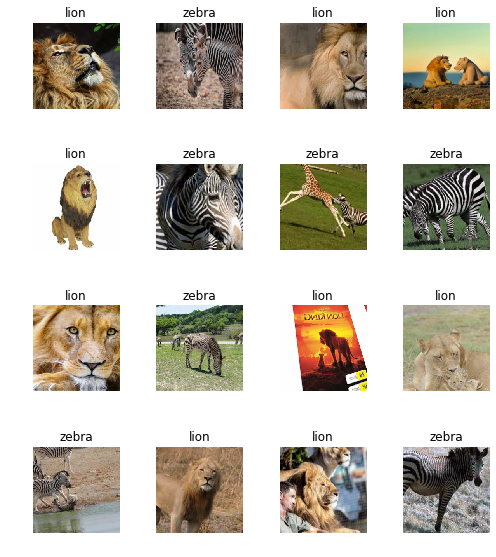

In [20]:
data.show_batch(rows=4, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lion', 'zebra'], 2, 320, 80)

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(3, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.842448,0.109548,0.025000,00:02
1,0.458968,0.042009,0.012500,00:02
2,0.323214,0.024080,0.012500,00:02


In [34]:
learn.fit_one_cycle(1, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.031821,0.017252,0.012500,00:02


In [35]:
learn.fit_one_cycle(1, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.027984,0.013846,0.012500,00:02


In [37]:
learn.fit_one_cycle(1, max_lr = 0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.022230,0.008241,0.000000,00:02


In [40]:
learn.save('weights-1')

Surprisingly, the default lr gives us perfect results which is explained by the confusion matrix also.

In [41]:
learn.unfreeze()

In [42]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


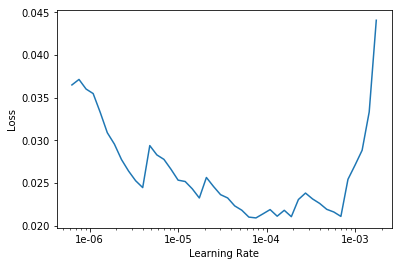

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(2, max_lr=slice(2e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.026423,0.009628,0.012500,00:03
1,0.015445,0.009082,0.000000,00:02


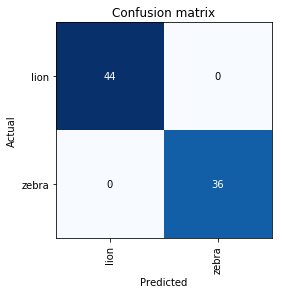

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [25]:
img = open_image(path/'lion'/'00000021.jpg')

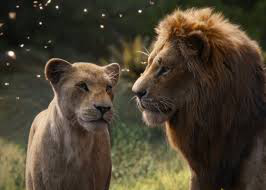

In [26]:
img

In [27]:
pred_class,pred_idx,outputs = learn.predict(img)
print('predicton is ' + pred_class.obj)

predicton is lion


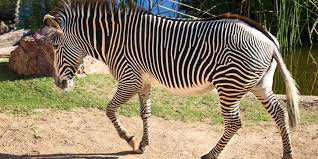

In [23]:
img2 = open_image(path/'zebra'/'00000022.jpg')
pred_class,pred_idx,outputs = learn.predict(img2)
img2

In [24]:
print('predicton is ' + pred_class.obj)

predicton is zebra


There is a brief section left about how to clean the dataset manually to get better results and how to export and import the saved learner to make a prediction.

In [3]:
help(untar_data)

NameError: name 'untar_data' is not defined